<a href="https://colab.research.google.com/github/MiG27K/First/blob/main/Titled_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

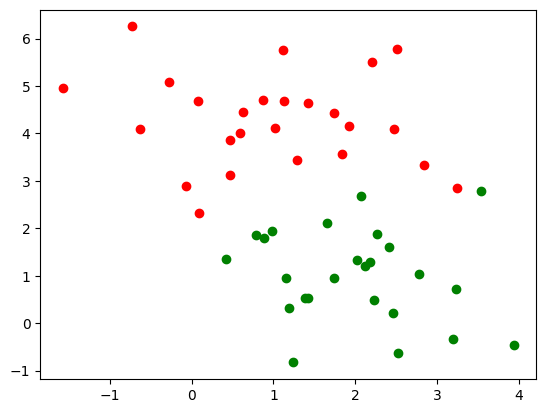

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
N = 50
data, labels = make_blobs(n_samples=50, centers=2, random_state=0)
def plot(data, labels):
  x1 = data[labels==0, 0]
  y1 = data[labels==0, 1]
  x2 = data[labels==1, 0]
  y2 = data[labels==1, 1]
  plt.scatter(x1, y1, color='red')
  plt.scatter(x2, y2, color='green')
plot(data, labels)

In [ ]:
import numpy as np

clusters = np.zeros(N)

In [ ]:
import random
i1 = random.randint(1, N)
i2 = random.randint(1, N)

xc1, yc1 = data[i1][0], data[i1][1]
xc2, yc2 = data[i2][0], data[i2][1]

In [ ]:
def plot_c(data, labels, xc1, yc1, xc2, yc2):
  x1 = data[labels==0, 0]
  y1 = data[labels==0, 1]
  x2 = data[labels==1, 0]
  y2 = data[labels==1, 1]
  plt.scatter(x1, y1, color='lightcoral')
  plt.scatter(x2, y2, color='lime')
  plt.scatter(xc1, yc1, color='red')
  plt.scatter(xc2, yc2, color='green')

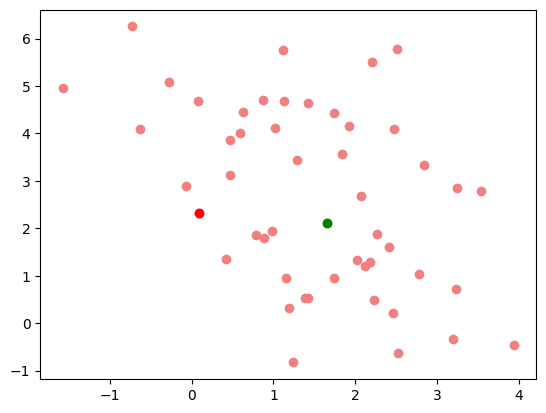

In [ ]:
plot_c(data, clusters, xc1, yc1, xc2, yc2)

In [ ]:
import math
def dist(x1, y1, x2, y2):
  return math.sqrt((x2 - x2)**2 + (y2 - y1)**2)

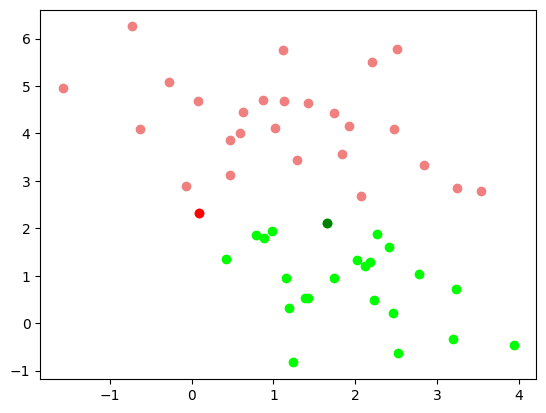

In [ ]:
def new_clusters(data, clusters, xc1, yc1, xc2, yc2):
  for i in range(len(data)):
    p = data[i]
    d1 = dist(p[0], p[1], xc1, yc1)
    d2 = dist(p[0], p[1], xc2, yc2)
    if d1 < d2:
      clusters[i] = 0
    else:
      clusters[i] = 1
  return clusters

cl2 = new_clusters(data, clusters, xc1, yc1, xc2, yc2)
plot_c(data, cl2, xc1, yc1, xc2, yc2)

In [ ]:
def update_c(data, clusters):
  x1 = data[clusters==0, 0]
  y1 = data[clusters==0, 1]
  x2 = data[clusters==1, 0]
  y2 = data[clusters==1, 1]
  xc1 = np.average(x1)
  xc2 = np.average(x2)
  yc1 = np.average(y1)
  yc2 = np.average(y2)
  return xc1, yc1, xc2, yc2

In [ ]:
def clusterization(data, max_iter_count):
  N = len(data)
  clusters = np.zeros(N)
  #First step: Random centers choose
  i1 = random.randint(1, N)
  i2 = random.randint(1, N)
  xc1, yc1 = data[i1][0], data[i1][1]
  xc2, yc2 = data[i2][0], data[i2][1]
  #Second step: Iterating update
  for i in range(max_iter_count):
    #Step two-one: New clusters identification
    clusters = new_clusters(data, clusters, xc1, yc1, xc2, yc2)
    #Step two-two: New centers created
    xc1, yc1, xc2, yc2 = update_c(data, clusters)
  return clusters

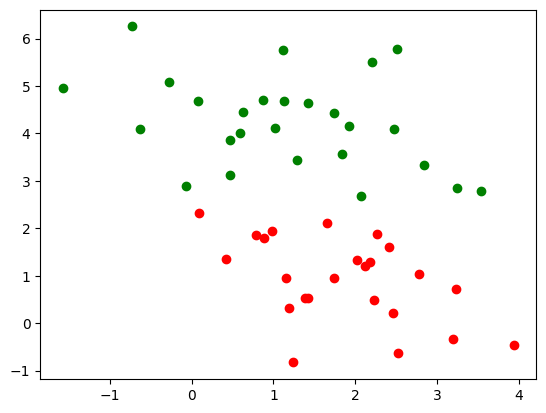

In [ ]:
results = clusterization(data, 50)
plot(data, results)